In [1]:
# Data Imports
import numpy as np
import pandas as pd

# Plot imports
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Machine Learning Imports
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# For evaluating our ML results
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve, auc

# Dataset Import
import statsmodels.api as sm

In [2]:
# Making the Confusion Matrix
def confusion_matrix_c(y_test,y_pred):
    cm = confusion_matrix(y_test, y_pred)
    class_label = ["No Affair", "Had Affair"]
    df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
    sns.heatmap(df_cm, annot=True, fmt='d')
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()
def plot_roc_auc_curve(fpr, tpr):
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange',
             lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

In [3]:
df = sm.datasets.fair.load_pandas().data

In [4]:
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


In [5]:
df.tail()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
6361,5.0,32.0,13.0,2.0,3.0,17.0,4.0,3.0,0.0
6362,4.0,32.0,13.0,1.0,1.0,16.0,5.0,5.0,0.0
6363,5.0,22.0,2.5,0.0,2.0,14.0,3.0,1.0,0.0
6364,5.0,32.0,6.0,1.0,3.0,14.0,3.0,4.0,0.0
6365,4.0,22.0,2.5,0.0,2.0,16.0,2.0,4.0,0.0


In [6]:
# Affair Check 
def check_affair(x):
    if x != 0:
        return 1
    else:
        return 0
#Apply to the Data
df['Had_Affair'] = df['affairs'].apply(check_affair)

In [7]:
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,Had_Affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1


In [8]:
df.tail()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,Had_Affair
6361,5.0,32.0,13.0,2.0,3.0,17.0,4.0,3.0,0.0,0
6362,4.0,32.0,13.0,1.0,1.0,16.0,5.0,5.0,0.0,0
6363,5.0,22.0,2.5,0.0,2.0,14.0,3.0,1.0,0.0,0
6364,5.0,32.0,6.0,1.0,3.0,14.0,3.0,4.0,0.0,0
6365,4.0,22.0,2.5,0.0,2.0,16.0,2.0,4.0,0.0,0


In [9]:
df.groupby('Had_Affair').mean()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
Had_Affair,,,,,,,,,
0,4.329701,28.390679,7.989335,1.238813,2.504521,14.322977,3.405286,3.833758,0.000000
1,3.647345,30.537019,11.152460,1.728933,2.261568,13.972236,3.463712,3.884559,2.187243


In [10]:
df.Had_Affair.value_counts()

0    4313
1    2053
Name: Had_Affair, dtype: int64

In [11]:
1-df['Had_Affair'].mean()

0.6775054979579014

In [12]:
df=pd.get_dummies(df, prefix=['occupation', 'occupation_husb'], columns=['occupation', 'occupation_husb'])
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,affairs,Had_Affair,occupation_1.0,occupation_2.0,occupation_3.0,occupation_4.0,occupation_5.0,occupation_6.0,occupation_husb_1.0,occupation_husb_2.0,occupation_husb_3.0,occupation_husb_4.0,occupation_husb_5.0,occupation_husb_6.0
0,3.0,32.0,9.0,3.0,3.0,17.0,0.111111,1,0,1,0,0,0,0,0,0,0,0,1,0
1,3.0,27.0,13.0,3.0,1.0,14.0,3.230769,1,0,0,1,0,0,0,0,0,0,1,0,0
2,4.0,22.0,2.5,0.0,1.0,16.0,1.400000,1,0,0,1,0,0,0,0,0,0,0,1,0
3,4.0,37.0,16.5,4.0,3.0,16.0,0.727273,1,0,0,0,0,1,0,0,0,0,0,1,0
4,5.0,27.0,9.0,1.0,1.0,14.0,4.666666,1,0,0,1,0,0,0,0,0,0,1,0,0


In [13]:
df.drop(['occupation_1.0','occupation_husb_1.0'],axis=1,inplace=True)

In [14]:
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,affairs,Had_Affair,occupation_2.0,occupation_3.0,occupation_4.0,occupation_5.0,occupation_6.0,occupation_husb_2.0,occupation_husb_3.0,occupation_husb_4.0,occupation_husb_5.0,occupation_husb_6.0
0,3.0,32.0,9.0,3.0,3.0,17.0,0.111111,1,1,0,0,0,0,0,0,0,1,0
1,3.0,27.0,13.0,3.0,1.0,14.0,3.230769,1,0,1,0,0,0,0,0,1,0,0
2,4.0,22.0,2.5,0.0,1.0,16.0,1.400000,1,0,1,0,0,0,0,0,0,1,0
3,4.0,37.0,16.5,4.0,3.0,16.0,0.727273,1,0,0,0,1,0,0,0,0,1,0
4,5.0,27.0,9.0,1.0,1.0,14.0,4.666666,1,0,1,0,0,0,0,0,1,0,0


In [15]:
X=df.drop(['affairs','Had_Affair'],axis=1)
y=df['Had_Affair']

In [16]:
X.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation_2.0,occupation_3.0,occupation_4.0,occupation_5.0,occupation_6.0,occupation_husb_2.0,occupation_husb_3.0,occupation_husb_4.0,occupation_husb_5.0,occupation_husb_6.0
0,3.0,32.0,9.0,3.0,3.0,17.0,1,0,0,0,0,0,0,0,1,0
1,3.0,27.0,13.0,3.0,1.0,14.0,0,1,0,0,0,0,0,1,0,0
2,4.0,22.0,2.5,0.0,1.0,16.0,0,1,0,0,0,0,0,0,1,0
3,4.0,37.0,16.5,4.0,3.0,16.0,0,0,0,1,0,0,0,0,1,0
4,5.0,27.0,9.0,1.0,1.0,14.0,0,1,0,0,0,0,0,1,0,0


In [17]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Had_Affair, dtype: int64

In [18]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [19]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  """


## Logistic Regression

In [20]:
# Fitting Logistic Regression to the Training set
lr= LogisticRegression(C=1,penalty='l1',random_state=42)
lr.fit(X_train,y_train)

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=42, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [21]:
# Predicting the Test set results
y_pred_lr= lr.predict(X_test)

In [22]:
print(classification_report(y_test,y_pred_lr))

              precision    recall  f1-score   support

           0       0.74      0.89      0.81      1275
           1       0.64      0.38      0.48       635

   micro avg       0.72      0.72      0.72      1910
   macro avg       0.69      0.64      0.65      1910
weighted avg       0.71      0.72      0.70      1910



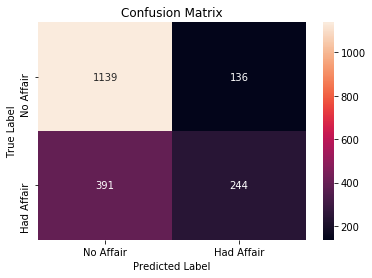

In [23]:
# Confusion Matrix
confusion_matrix_c(y_test, y_pred_lr)

In [24]:
#Score of Prediction
lr_score_train = lr.score(X_train,y_train)
print("Train Prediction Score",lr_score_train*100)
lr_score_test = accuracy_score(y_test,y_pred_lr)
print("Test Prediction Score",lr_score_test*100)

Train Prediction Score 72.5314183123878
Test Prediction Score 72.40837696335079


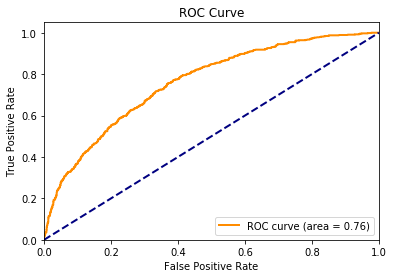

In [25]:
y_predict_probabilities = lr.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_predict_probabilities)
roc_auc = auc(fpr, tpr)
plot_roc_auc_curve(fpr, tpr)

## K-Nearest Neighbour

In [26]:
# Fitting KNN to the Training set
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [27]:
# Predicting the Test set results
y_pred_knn= lr.predict(X_test)

In [28]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.74      0.89      0.81      1275
           1       0.64      0.38      0.48       635

   micro avg       0.72      0.72      0.72      1910
   macro avg       0.69      0.64      0.65      1910
weighted avg       0.71      0.72      0.70      1910



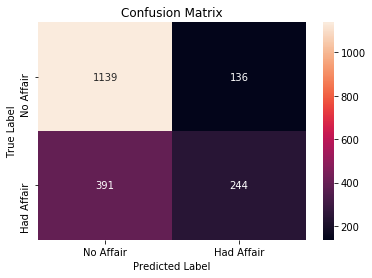

In [29]:
# Confusion Matrix
confusion_matrix_c(y_test, y_pred_knn)

In [30]:
#Score of Prediction
knn_score_train = knn.score(X_train,y_train)
print("Train Prediction Score",knn_score_train*100)
knn_score_test = accuracy_score(y_test,y_pred_knn)
print("Test Prediction Score",knn_score_test*100)

Train Prediction Score 77.4685816876122
Test Prediction Score 72.40837696335079


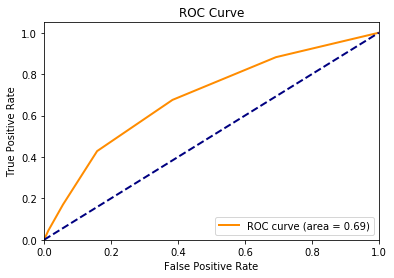

In [31]:
y_predict_probabilities = knn.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_predict_probabilities)
roc_auc = auc(fpr, tpr)
plot_roc_auc_curve(fpr, tpr)

# Support Vector Machine

In [32]:
# Fitting SVM to the Training set
svc = SVC(kernel = 'linear',random_state = 42,probability=True)
svc.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=True, random_state=42,
  shrinking=True, tol=0.001, verbose=False)

In [33]:
# Predicting the Test set results
y_pred_svc= svc.predict(X_test)

In [34]:
print(classification_report(y_test,y_pred_svc))

              precision    recall  f1-score   support

           0       0.73      0.94      0.82      1275
           1       0.72      0.29      0.41       635

   micro avg       0.73      0.73      0.73      1910
   macro avg       0.72      0.62      0.62      1910
weighted avg       0.72      0.73      0.68      1910



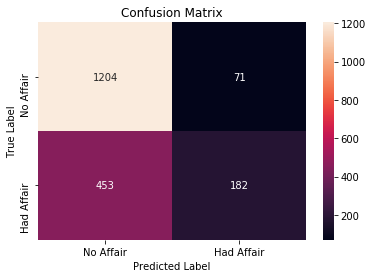

In [35]:
# Confusion Matrix
confusion_matrix_c(y_test, y_pred_svc)

In [36]:
#Score of Prediction
svc_score_train = svc.score(X_train,y_train)
print("Train Prediction Score",svc_score_train*100)
svc_score_test = accuracy_score(y_test,y_pred_svc)
print("Test Prediction Score",svc_score_test*100)

Train Prediction Score 71.88061041292639
Test Prediction Score 72.56544502617801


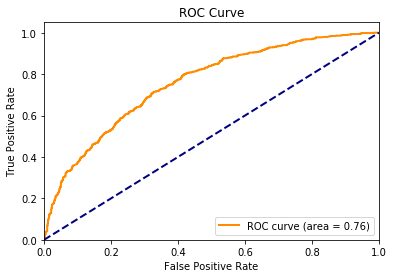

In [37]:
y_predict_probabilities = svc.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_predict_probabilities)
roc_auc = auc(fpr, tpr)
plot_roc_auc_curve(fpr, tpr)

## Kernel SVM

In [38]:
# Fitting Kernel SVM n to the Training set
ksvc = SVC(kernel = 'rbf',random_state = 42,probability=True)
ksvc.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=True, random_state=42,
  shrinking=True, tol=0.001, verbose=False)

In [39]:
# Predicting the Test set results
y_pred_ksvc= ksvc.predict(X_test)

In [40]:
print(classification_report(y_test,y_pred_ksvc))

              precision    recall  f1-score   support

           0       0.73      0.93      0.82      1275
           1       0.70      0.31      0.43       635

   micro avg       0.73      0.73      0.73      1910
   macro avg       0.71      0.62      0.63      1910
weighted avg       0.72      0.73      0.69      1910



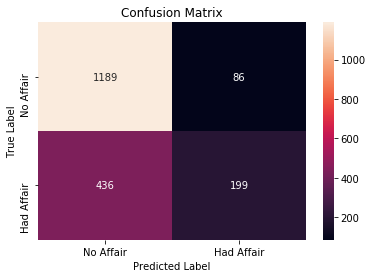

In [41]:
# Confusion Matrix
confusion_matrix_c(y_test, y_pred_ksvc)

In [42]:
#Score of Prediction
ksvc_score_train = ksvc.score(X_train,y_train)
print("Train Prediction Score",ksvc_score_train*100)
ksvc_score_test = accuracy_score(y_test,y_pred_ksvc)
print("Test Prediction Score",ksvc_score_test*100)

Train Prediction Score 73.36175942549372
Test Prediction Score 72.67015706806282


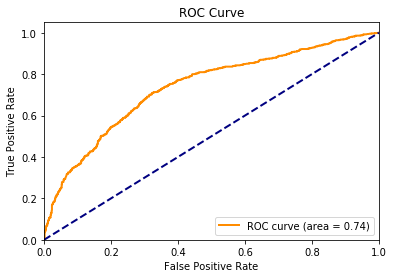

In [43]:
y_predict_probabilities = ksvc.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_predict_probabilities)
roc_auc = auc(fpr, tpr)
plot_roc_auc_curve(fpr, tpr)

## Naive Bayes

In [44]:
# Fitting Logistic Regression to the Training set
nb = GaussianNB()
nb.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [45]:
# Predicting the Test set results
y_pred_nb= nb.predict(X_test)

In [46]:
print(classification_report(y_test,y_pred_nb))

              precision    recall  f1-score   support

           0       0.75      0.81      0.78      1275
           1       0.56      0.47      0.51       635

   micro avg       0.70      0.70      0.70      1910
   macro avg       0.66      0.64      0.65      1910
weighted avg       0.69      0.70      0.69      1910



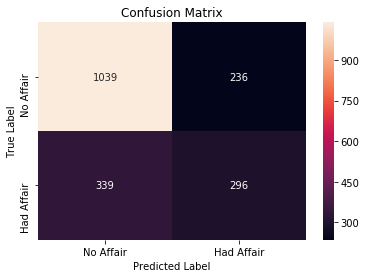

In [47]:
# Confusion Matrix
confusion_matrix_c(y_test, y_pred_nb)

In [48]:
#Score of Prediction
nb_score_train = nb.score(X_train,y_train)
print("Train Prediction Score",nb_score_train*100)
nb_score_test = accuracy_score(y_test,y_pred_nb)
print("Test Prediction Score",nb_score_test*100)

Train Prediction Score 70.04039497307002
Test Prediction Score 69.89528795811518


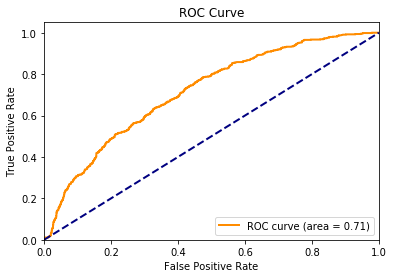

In [49]:
y_predict_probabilities = nb.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_predict_probabilities)
roc_auc = auc(fpr, tpr)
plot_roc_auc_curve(fpr, tpr)

## Decision Tree Classifier

In [50]:
# GridSearchCV
param_grid={'max_depth':range(1,15,2) ,
            'max_features':range(1,15,2)}
dt_g=DecisionTreeClassifier(random_state = 42)
dt_cv=GridSearchCV(dt_g,param_grid,cv=10,scoring='accuracy',n_jobs=-1)
dt_cv.fit(X_train,y_train)

print("Best parameters:",dt_cv.best_params_)
print("Accuracy :",dt_cv.best_score_)

Best parameters: {'max_depth': 3, 'max_features': 11}
Accuracy : 0.7203770197486535


In [51]:
# Fitting Logistic Regression to the Training set
dt = DecisionTreeClassifier(max_depth=3,max_features=11,random_state = 42)
dt.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=11, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [52]:
# Predicting the Test set results
y_pred_dt= dt.predict(X_test)

In [53]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.75      0.86      0.80      1275
           1       0.60      0.43      0.50       635

   micro avg       0.72      0.72      0.72      1910
   macro avg       0.68      0.65      0.65      1910
weighted avg       0.70      0.72      0.70      1910



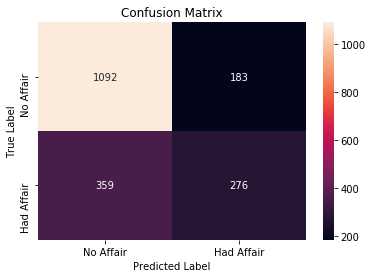

In [54]:
# Confusion Matrix
confusion_matrix_c(y_test, y_pred_dt)

In [55]:
#Score of Prediction
dt_score_train = dt.score(X_train,y_train)
print("Train Prediction Score",dt_score_train*100)
dt_score_test = accuracy_score(y_test,y_pred_dt)
print("Test Prediction Score",dt_score_test*100)

Train Prediction Score 72.08258527827648
Test Prediction Score 71.62303664921465


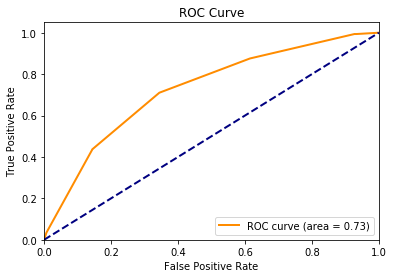

In [56]:
y_predict_probabilities = dt.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_predict_probabilities)
roc_auc = auc(fpr, tpr)
plot_roc_auc_curve(fpr, tpr)

## Random Forest

In [57]:
# GridSearchCV
param_grid={'max_depth':range(1,15,2),
            'n_estimators':[125,250],
            'max_features':range(1,15,2)}
dt_g=RandomForestClassifier(random_state=42)
dt_cv=GridSearchCV(dt_g,param_grid,cv=10,scoring='f1_micro',n_jobs=-1)
dt_cv.fit(X_train,y_train)

print("Best parameters:",dt_cv.best_params_)
print("Accuracy :",dt_cv.best_score_)

Best parameters: {'max_depth': 7, 'max_features': 11, 'n_estimators': 125}
Accuracy : 0.7217235188509874


In [58]:
# Fitting Logistic Regression to the Training set
rf = RandomForestClassifier(max_depth=7,max_features=11,n_estimators=125,random_state=42)
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=7, max_features=11, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=125, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [59]:
# Predicting the Test set results
y_pred_rf= dt.predict(X_test)

In [60]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.75      0.86      0.80      1275
           1       0.60      0.43      0.50       635

   micro avg       0.72      0.72      0.72      1910
   macro avg       0.68      0.65      0.65      1910
weighted avg       0.70      0.72      0.70      1910



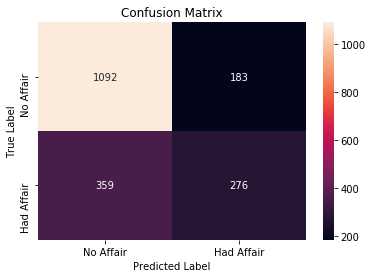

In [61]:
# Confusion Matrix
confusion_matrix_c(y_test, y_pred_rf)

In [62]:
#Score of Prediction
rf_score_train = rf.score(X_train,y_train)
print("Train Prediction Score",rf_score_train*100)
rf_score_test = accuracy_score(y_test,y_pred_rf)
print("Test Prediction Score",rf_score_test*100)

Train Prediction Score 76.5709156193896
Test Prediction Score 71.62303664921465


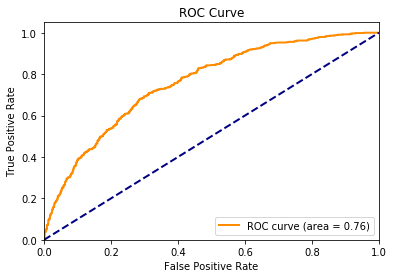

In [63]:
y_predict_probabilities = rf.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_predict_probabilities)
roc_auc = auc(fpr, tpr)
plot_roc_auc_curve(fpr, tpr)

## Gradient Boosting

In [64]:
# GridSearchCV
param_grid={'max_depth':range(1,15,2),
            'n_estimators':[125,250],
           'min_child_weight':[1,3,6]}
xgb_g=XGBClassifier(random_state=42)
xgb_cv=GridSearchCV(xgb_g,param_grid,cv=10,scoring='accuracy',n_jobs=-1)
xgb_cv.fit(X_train,y_train)

print("Best parameters:",xgb_cv.best_params_)
print("Accuracy :",xgb_cv.best_score_)

Best parameters: {'max_depth': 3, 'min_child_weight': 6, 'n_estimators': 250}
Accuracy : 0.7250897666068222


In [65]:
# Fitting Logistic Regression to the Training set
xgbc = XGBClassifier(max_depth=3,min_child_weight=6,n_estimators=250,random_state=42)
xgbc.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=6, missing=None, n_estimators=250,
       n_jobs=1, nthread=None, objective='binary:logistic',
       random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1)

In [66]:
# Predicting the Test set results
y_pred_xgbc= dt.predict(X_test)

In [67]:
print(classification_report(y_test,y_pred_xgbc))

              precision    recall  f1-score   support

           0       0.75      0.86      0.80      1275
           1       0.60      0.43      0.50       635

   micro avg       0.72      0.72      0.72      1910
   macro avg       0.68      0.65      0.65      1910
weighted avg       0.70      0.72      0.70      1910



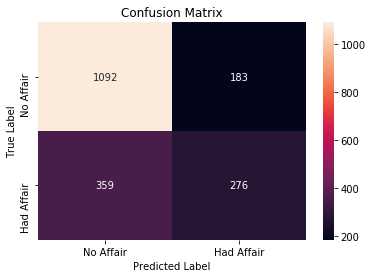

In [68]:
# Confusion Matrix
confusion_matrix_c(y_test, y_pred_xgbc)

In [69]:
#Score of Prediction
xgbc_score_train = xgbc.score(X_train,y_train)
print("Train Prediction Score",xgbc_score_train*100)
xgbc_score_test = accuracy_score(y_test,y_pred_xgbc)
print("Test Prediction Score",xgbc_score_test*100)

Train Prediction Score 75.4488330341113
Test Prediction Score 71.62303664921465


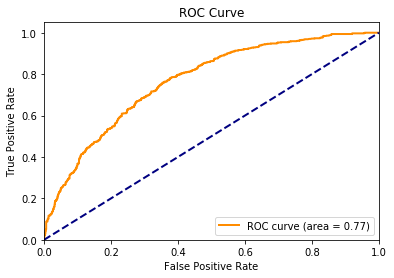

In [70]:
y_predict_probabilities = xgbc.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_predict_probabilities)
roc_auc = auc(fpr, tpr)
plot_roc_auc_curve(fpr, tpr)